# Credit Standing

# INFO 1998 Final Project


Mike Zheng (MZ524) and Olu Ogundare (odo5)

This project performs an explorative data and predictive analysis on a dataset on individual's credit score 
standings vs their financial behaviors and other financial factors.

We want to answer the following questions
1. What features can we use to predict the outstanding debt of a person? (Regression)
2. Given certain features, can we predict the a person's credit standing? (Classification)

The approach is outlined as follows:
1. Preprocessing and cleaning the dataset
2. Data Visualization
3. Machine Learning Models
4. Conclusion

In [242]:
#Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import datasets


# Step 1: Obtaining and organizing data

In [243]:
#Obtain Data
all_data = pd.read_csv('credit_score.csv')

#  Draw samples of 5000 data, since the data set contains a total amount of 50,000 values and it will take a
#  long time to manipulate and clean up 50,000 data. So we decided to draw a sample of 5000 to be a representative
#  data set of the overall data.

samples = all_data.sample(5000)
df = samples.drop(['ID','Customer_ID','Month','Name','SSN','Occupation', 'Type_of_Loan'], axis=1) 
df


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
2567,26_,60585.08,4977.756667,8,6,2241,2,21,8,3.16,5.0,Good,461.13,24.976476,25 Years and 2 Months,No,84.260825,250.55593963813763,Low_spent_Medium_value_payments,442.9589020856568
38036,45,28828.86,2631.405000,7,7,19,8,23,23,12.11,11.0,Bad,2982.96,31.930851,6 Years and 7 Months,Yes,144.038689,177.96909695029282,High_spent_Small_value_payments,201.1327139808212
48882,36_,19879.05,1464.587500,4,4,12,0,25,12,11.03,7.0,Standard,1013.71,25.397560,19 Years and 5 Months,NM,0.000000,42.72473951233214,High_spent_Small_value_payments,363.73401048766783
30811,31,14432.87,1185.739167,3,7,7,-100,5,8,9.47,8.0,Good,941.79,34.441677,33 Years and 3 Months,No,6.412119,41.03600289636189,Low_spent_Medium_value_payments,351.1257947752282
32390,26,83210.28,NaN,4,7,17,2,8,13,12.5,8.0,_,1001.02,25.320447,NaN,Yes,122.008249,463.496516225755,Low_spent_Medium_value_payments,399.6142351996309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33062,22,58184.67,NaN,5,4,9,3,24,12,5.36,4.0,_,309.14,29.737159,24 Years and 5 Months,NM,320.169642,103.9789136177475,High_spent_Large_value_payments,480.7347978031143
24868,20,66061.04,NaN,6,5,22,3,27,22,4.92,17.0,Bad,1801.38,39.020466,12 Years and 10 Months,Yes,100.802186,76.05095224746078,High_spent_Medium_value_payments,649.3555281059023
26184,20,73140.38,5799.031667,3,5,15,1_,9,12,14.56,7.0,Standard,1056.32,26.856850,26 Years and 0 Months,Yes,44.981592,351.0753884729198,High_spent_Small_value_payments,443.84618587449324
32436,50,39491.26,3129.938333,7,5,9,0,9,14,1.1,3.0,Standard,730.89,28.566882,18 Years and 10 Months,Yes,0.000000,__10000__,High_spent_Small_value_payments,506.5980371041112


In [244]:
# Since some values in the data set have '_', we couldn't convert some column dataset into
# float type and calculate numerical values like mean and standard deviation.
# To fix this issue, we have to reorganize the data set. We strip '_' from all 
# the data in the dataframe, and then convert them into float type. 

df['Amount_invested_monthly']= df['Amount_invested_monthly'].str.strip('_')
df['Amount_invested_monthly']= df['Amount_invested_monthly'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.strip('_')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Annual_Income']= df['Annual_Income'].str.strip('_')
df['Annual_Income']= df['Annual_Income'].astype(float)
df['Num_of_Loan']= df['Num_of_Loan'].str.strip('_')
df['Num_of_Loan']= df['Num_of_Loan'].astype(float)
df['Monthly_Balance']= df['Monthly_Balance'].str.strip('_')
df['Monthly_Balance']= df['Monthly_Balance'].astype(float)

In [245]:
# We now create a new numerical data frame, where Good Credit -> 1, 
# Standard Credit -> 0, and Bad Credit -> -1 to help us calculate 
# numerical values like linear regressions and such.

indices = df.index

df['Credits'] = 0
for x in range(len(df)):
    if df['Credit_Mix'][indices[x]] == 'Good':
        df['Credits'][indices[x]] = 1
    elif df['Credit_Mix'][indices[x]] == 'Standard':
        df['Credits'][indices[x]] = 0
    elif df['Credit_Mix'][indices[x]] == 'Bad':
        df['Credits'][indices[x]] = -1

/var/folders/hw/yz8srx752xl20r4h2d4yxnn00000gn/T/ipykernel_1069/2939523657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credits'][indices[x]] = 1
/var/folders/hw/yz8srx752xl20r4h2d4yxnn00000gn/T/ipykernel_1069/2939523657.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credits'][indices[x]] = -1
/var/folders/hw/yz8srx752xl20r4h2d4yxnn00000gn/T/ipykernel_1069/2939523657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [260]:
# Split and reorganize entire data frames to 3 catagories based on their credit standings.
# This will help us visualize differences of each credit standing.

bad_credits = df[df['Credit_Mix'] == 'Bad']
bad_credits['Monthly_Inhand_Salary']=bad_credits['Monthly_Inhand_Salary'].fillna(bad_credits['Monthly_Inhand_Salary'].mean())
good_credits = df[df['Credit_Mix'] == 'Good']
good_credits['Monthly_Inhand_Salary']=good_credits['Monthly_Inhand_Salary'].fillna(good_credits['Monthly_Inhand_Salary'].mean())
standard_credits = df[df['Credit_Mix'] == 'Standard']
standard_credits['Monthly_Inhand_Salary']=standard_credits['Monthly_Inhand_Salary'].fillna(standard_credits['Monthly_Inhand_Salary'].mean())



/var/folders/hw/yz8srx752xl20r4h2d4yxnn00000gn/T/ipykernel_1069/2723100923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_credits['Monthly_Inhand_Salary']=bad_credits['Monthly_Inhand_Salary'].fillna(bad_credits['Monthly_Inhand_Salary'].mean())
/var/folders/hw/yz8srx752xl20r4h2d4yxnn00000gn/T/ipykernel_1069/2723100923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_credits['Monthly_Inhand_Salary']=good_credits['Monthly_Inhand_Salary'].fillna(good_credits['Monthly_Inhand_Salary'].mean())
/va

In [247]:
print(df['Outstanding_Debt'].mean())
print(bad_credits['Outstanding_Debt'].mean())
print(standard_credits['Outstanding_Debt'].mean())
print(good_credits['Outstanding_Debt'].mean())

1418.3701599999984
3032.6119509594905
1061.6803094984007
741.7360893854749


# Step 2: Visualize Data

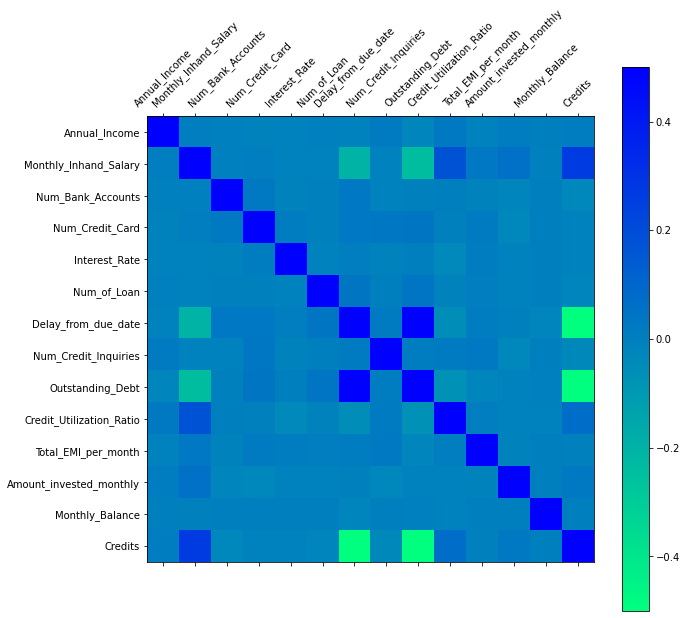

In [318]:
##Create a correlation matrix which allows us to see what data may be useful for predicting an individual's credit score

corr = df.corr()
fig = plt.figure() 
ax = fig.add_subplot(111) 
fig.colorbar(ax.matshow(corr, cmap='winter_r', vmin=-0.5, vmax=0.5)) 
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns) 
ax.set_xticks(range(len(corr.columns))) 
ax.set_xticklabels(corr.columns) 
for t in ax.get_xticklabels(): 
        t.set_rotation(45)
ax.set_yticks(range(len(corr.columns))) 
ax.set_yticklabels(corr.columns) 
fig.set_figheight(10)
fig.set_figwidth(10)

plt.show()


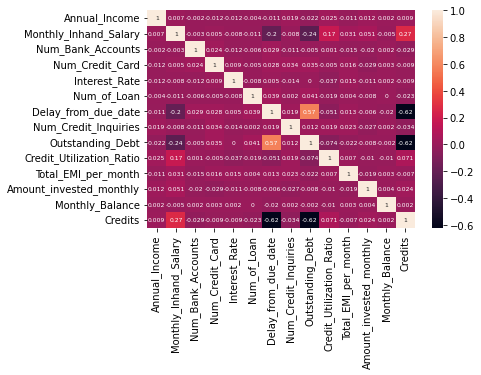

In [319]:
##Correlation matrix using a different method which has values in the boxes

corr = df.corr()
sb.heatmap(corr.round(3), annot=True, annot_kws={"size":6})

plt.show()


Average Late Payments vs Credits

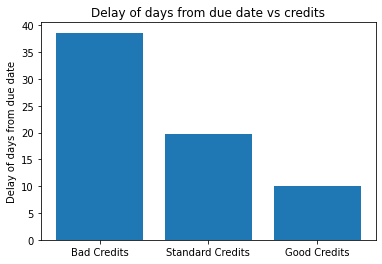

In [308]:
bar1 = (bad_credits['Delay_from_due_date']).mean()
bar2 = (standard_credits['Delay_from_due_date']).mean()
bar3 = (good_credits['Delay_from_due_date']).mean()

# Adding the two bars and assigning attributes
plt.bar([0,1,2],[bar1,bar2, bar3],align='center')

# Add a suitable title
plt.title('Delay of days from due date vs credits')

# Adding suitable labels to the axes
plt.xticks([0,1,2],['Bad Credits','Standard Credits', 'Good Credits'])
plt.ylabel('Delay of days from due date')

plt.show()

From this bar graph visualization, we see that bad credits has the highest number of late payments, followed by standard credits, and good credits.


Outstand Debts vs Credits

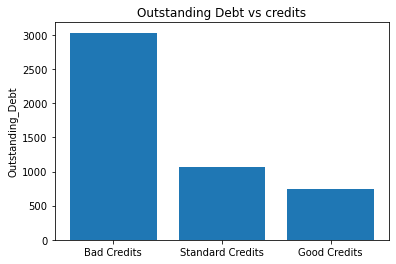

In [250]:
bar1 = (bad_credits['Outstanding_Debt']).mean()
bar2 = (standard_credits['Outstanding_Debt']).mean()
bar3 = (good_credits['Outstanding_Debt']).mean()

# Adding the two bars and assigning attributes
plt.bar([0,1,2],[bar1,bar2, bar3],align='center')

# Add a suitable title
plt.title('Outstanding Debt vs credits')

# Adding suitable labels to the axes
plt.xticks([0,1,2],['Bad Credits','Standard Credits', 'Good Credits'])
plt.ylabel('Outstanding_Debt')

plt.show()

From this bar graph visualization, we see that bad credits has the highest outstanding debts, followed by standard credits, and good credits.


Monthly Inhand Salary vs Credits

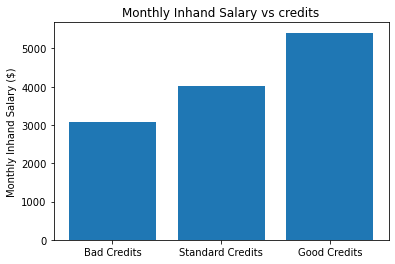

In [251]:
bar1 = (bad_credits['Monthly_Inhand_Salary']).mean()
bar2 = (standard_credits['Monthly_Inhand_Salary']).mean()
bar3 = (good_credits['Monthly_Inhand_Salary']).mean()

# Adding the two bars and assigning attributes
plt.bar([0,1,2],[bar1,bar2, bar3],align='center')

# Add a suitable title
plt.title('Monthly Inhand Salary vs credits')

# Adding suitable labels to the axes
plt.xticks([0,1,2],['Bad Credits','Standard Credits', 'Good Credits'])
plt.ylabel('Monthly Inhand Salary ($)')

plt.show()

From this bar graph visualization, we see that Good Credits has the highest Monthly Inhand Salary, followed by standard credits, and bad credits.

Interest rate vs Late Payment of different credits

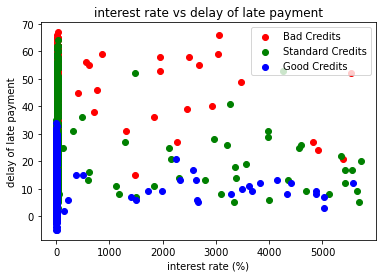

In [309]:
xaxis1 = bad_credits['Interest_Rate']
xaxis2 = standard_credits['Interest_Rate']
xaxis3 = good_credits['Interest_Rate']
yaxis1 = bad_credits['Delay_from_due_date']
yaxis2 = standard_credits['Delay_from_due_date']
yaxis3 = good_credits['Delay_from_due_date']

plt.scatter(xaxis1, yaxis1, c="red", label = "Bad Credits")
plt.scatter(xaxis2, yaxis2, c="green", label = "Standard Credits")
plt.scatter(xaxis3, yaxis3, c="blue", label = "Good Credits")
plt.title('interest rate vs delay of late payment')
plt.xlabel('interest rate (%)')
plt.ylabel('delay of late payment')
plt.legend()

plt.show()


From this scatter plot visualization of interest rate vs number of days payments are delayed of different credit standings, we see that while many individuals across different credit standings have 0 interest rate, individuals with bad credits scores tend to have more days that are delayed from their due date, followed by individuals with standard credits and good credits as we see more blue populations on the bottom half, green in the middle and red correspondants on the top. 

# Step 3: Machine Learning Models

Classifcation Model

Delay Payment and Outstanding Debt to classify Credit Standing

In [320]:
#Choosing our features
X = df[['Delay_from_due_date', 'Outstanding_Debt', 'Monthly_Inhand_Salary']]
Y = df['Credit_Mix']

#Utilizing train_test_split to create a KNeighbors Classifier model and then fitting it to our data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
knn_pred_train = model.predict(x_train)
knn_pred_test = model.predict(x_test)

#Computing the training and testing score of our model
print("Train Accuracy: ", accuracy_score(y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, knn_pred_test))

Train Accuracy:  0.642
Test Accuracy:  0.4885


Analysis: 

Here we used a KNeighbors Classifier model in order to predict our target feature, the credit score. For this model we used the features outstanding debt, monthly in hand salary, and delay from due date. These features allow us to see general aspects of each user, ranging from the current cash that they have on hand which is important for paying off their credit card balance, but also aspects of their ability to pay off debt. We believe that by using these features, it would allow us to create a model that can accurately predict an individual's credit score. After running this model with a hyperparameter of 5 neighbors, we got a training score of 0.642 and a testing score of .48 which is not that high. This tells us that our current model does not perform the best and it is possible that by fine tuning the hyperparameter, the overall score may increase.  

Linear Regression Model

In [321]:
#Gathering our features to train off of
X = df[['Delay_from_due_date', 'Outstanding_Debt','Monthly_Inhand_Salary']]
Y = df['Credits']

#Creating a Linear Regression model which we then fit with our data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
print("sklearn's score for price:", model.score(x_train, y_train))


sklearn's score for price: 0.49791442389517504


Analysis: 


From the linear regression model, we try to predict Credit (which range from -1 to 1 depending on Good/Standard/Bad) using the three features. We see that the sklearn score for our prediction is actually lower than our KNN classifcation model, and this makes sense because the features does not necessarily provides a linear correlation with the different standings of credit scores. 

Logistic Model

In [322]:
#Choosing Features
X = df[['Delay_from_due_date', 'Outstanding_Debt', 'Monthly_Inhand_Salary']]
Y = df['Credits']

#Creating adn fitting model
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
log = LogisticRegression()
log.fit(x_train, y_train)
test_pred = log.predict(x_test)
train_pred = log.predict(x_train)

#Printing out training and testing score
print("Test Accuracy: ", accuracy_score(y_test, test_pred))
print("Training Accuracy: ", accuracy_score(y_train, train_pred))


Test Accuracy:  0.674
Training Accuracy:  0.6856666666666666


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Analysis: 

For the logistic regression model, we tried the same thing to predict Credit (which range from -1 to 1 depending on Good/Standard/Bad) using the same three features. However, we that the testing accuracy for logistic model is higher than linear regression model. This makes sense to us since looking at bad credit standing vs good credit standing, we know that there are extreme high difference between the two, such example include individual with bad credit score has significantly higher number of late payments and outstanding debt than individuals with good credit standing.

In [323]:
#Choosing our features for the decision tree model
features = pd.DataFrame()
features["1"] = df[["Delay_from_due_date"]]
features["2"] = df[['Outstanding_Debt']]
features["3"] = df[['Monthly_Inhand_Salary']]
X = features
Y = df["Credit_Mix"]

#Creating and fitting the model
model = DecisionTreeClassifier(max_depth = 5)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 42)

model.fit(X_train, Y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

##Printing out testing score
print("Training Accuracy:", accuracy_score(Y_train, predictions_train))
print("Testing Accuracy:", accuracy_score(Y_test, predictions_test))



Training Accuracy: 0.6136666666666667
Testing Accuracy: 0.5965


In [324]:
#Creating variables to keep track of best performance
training_accuracies = []
testing_accuracies = []
depths = []
best_score = 0
best_depth = 1
#Loop through a range of 0-50 in order to compute the best depth for our decision tree model
for x in range(1, 50):
    depths.append(x)
    model = DecisionTreeClassifier(max_depth = x)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 42)
    model.fit(X_train, Y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train, predictions_train))
    testing_accuracies.append(accuracy_score(Y_test, predictions_test))

    if accuracy_score(Y_test, predictions_test) > best_score:
        best_depth = x
        best_score = accuracy_score(Y_test, predictions_test)




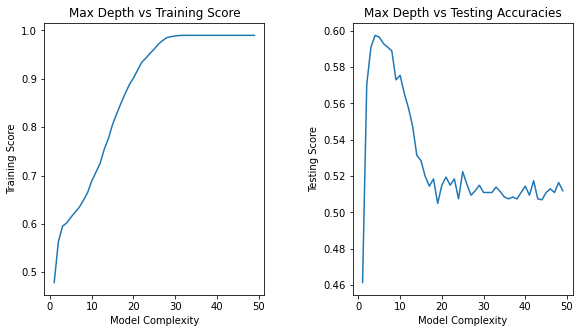

In [316]:
plt.subplots(figsize=(15,5))
plt.subplots_adjust(wspace=0.4)
plt.subplot(131)
plt.plot(depths, training_accuracies)
plt.title('Max Depth vs Training Score')
plt.xlabel('Model Complexity')
plt.ylabel('Training Score')
plt.subplot(132)
plt.plot(depths, testing_accuracies)
plt.title("Max Depth vs Testing Accuracies")
plt.xlabel('Model Complexity')
plt.ylabel('Testing Score')
plt.show()


In [317]:
print("Best depth is", best_depth)
print("Best depth accuracy score is", best_score)

Best depth is 4
Best depth accuracy score is 0.5975


Analyis:

Here we used the Decision Tree Classifier in which we used three features, Delay from due date, Outstanding Debt, and Monthly Inhand Salary. We believe that these features are a representative metric of each individual and can allow us to have high model performance. After running our code with a tree depth of 5, we believed that our score function could be enhanced if we fine tuned the tree depth. To do this, we looped through various depths and then found which depth provided the best training score. We found this depth to be 7 and it tells us that a tree depth of 7 allows for the best testing accuracy without our model becoming too susceptible to overfitting. 


# Conclusion:

From our matrix graph, we see that Credits have the greatest correlation with these three features: delay from due dates, monthly inhand salary, and outstanding debts. We were able to test this hypothesis obtained from the matrix graph by using KNN model to classify individual's credit standings. We were able to obtain a test accuracy of .49. We continued to test this hypothesis and tried to fine tune and improve the accuracy of our model through a decision tree classifer to optimize our best max depth. And we were able to improve our accuracy score to .60. 

The results showed us that individual finance behaviors such as number of days late from due dates, debts, and income, although not super decisive, all plays a decent role that contributes to their credit score.

In future projects, we would love to conduct research on more feautres and test their correlation to individuals's credit scores. However, it would also be interesting if we can come up with a reverse model and acutal credit scores (from 300-850), where we actually use an individual's credit score to predict their finanical behaviors such as their payment behavior, investments, and debts etc. One limiting factor in our model was that is was predicting a variable which only had three categories, but in the future we would love to create more models that could predict real FICO credit scores.